# CatBoost

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
model = CatBoostClassifier().fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [5]:
tuned_parameters = {
    "iterations": [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],
    "learning_rate": [0.1,0.01,0.001,0.2,0.02,0.002,0.3,0.03,0.003,0.4,0.04,0.004,0.5,0.05,0.005],
    "depth" : [2,3,4,5,6,7,8,9,10],
}
model = CatBoostClassifier()
model_cv = GridSearchCV(model, tuned_parameters, cv=10, n_jobs=-1, verbose=0).fit(X_train, y_train)

0:	learn: 0.6300655	total: 5.9ms	remaining: 1.47s
1:	learn: 0.5755607	total: 11.3ms	remaining: 1.41s
2:	learn: 0.5365344	total: 16.7ms	remaining: 1.38s
3:	learn: 0.5012899	total: 22.3ms	remaining: 1.37s
4:	learn: 0.4694621	total: 27.9ms	remaining: 1.37s
5:	learn: 0.4440791	total: 33.3ms	remaining: 1.35s
6:	learn: 0.4225922	total: 38.8ms	remaining: 1.35s
7:	learn: 0.4040637	total: 44.3ms	remaining: 1.34s
8:	learn: 0.3878700	total: 49.7ms	remaining: 1.33s
9:	learn: 0.3679314	total: 55.2ms	remaining: 1.32s
10:	learn: 0.3524302	total: 60.4ms	remaining: 1.31s
11:	learn: 0.3399882	total: 65.8ms	remaining: 1.3s
12:	learn: 0.3250109	total: 71ms	remaining: 1.29s
13:	learn: 0.3220894	total: 72.3ms	remaining: 1.22s
14:	learn: 0.3127329	total: 77.5ms	remaining: 1.21s
15:	learn: 0.3049920	total: 83.1ms	remaining: 1.22s
16:	learn: 0.2940152	total: 88.3ms	remaining: 1.21s
17:	learn: 0.2867241	total: 93.8ms	remaining: 1.21s
18:	learn: 0.2782598	total: 99.8ms	remaining: 1.21s
19:	learn: 0.2708636	total

166:	learn: 0.0304300	total: 909ms	remaining: 452ms
167:	learn: 0.0301758	total: 913ms	remaining: 446ms
168:	learn: 0.0298108	total: 918ms	remaining: 440ms
169:	learn: 0.0294284	total: 924ms	remaining: 435ms
170:	learn: 0.0291273	total: 928ms	remaining: 429ms
171:	learn: 0.0289844	total: 932ms	remaining: 423ms
172:	learn: 0.0286379	total: 937ms	remaining: 417ms
173:	learn: 0.0284837	total: 942ms	remaining: 412ms
174:	learn: 0.0284058	total: 947ms	remaining: 406ms
175:	learn: 0.0280340	total: 952ms	remaining: 400ms
176:	learn: 0.0278510	total: 957ms	remaining: 395ms
177:	learn: 0.0276251	total: 961ms	remaining: 389ms
178:	learn: 0.0275666	total: 965ms	remaining: 383ms
179:	learn: 0.0274618	total: 970ms	remaining: 377ms
180:	learn: 0.0270957	total: 974ms	remaining: 371ms
181:	learn: 0.0267735	total: 978ms	remaining: 366ms
182:	learn: 0.0264299	total: 983ms	remaining: 360ms
183:	learn: 0.0261049	total: 987ms	remaining: 354ms
184:	learn: 0.0258583	total: 992ms	remaining: 348ms
185:	learn: 

In [6]:
best = model_cv.best_estimator_
model_cv.best_params_

{'depth': 9, 'iterations': 250, 'learning_rate': 0.1}

In [22]:
model_tuned = CatBoostClassifier(depth=9, iterations=250, learning_rate=0.1).fit(X_train, y_train, verbose=False)
y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

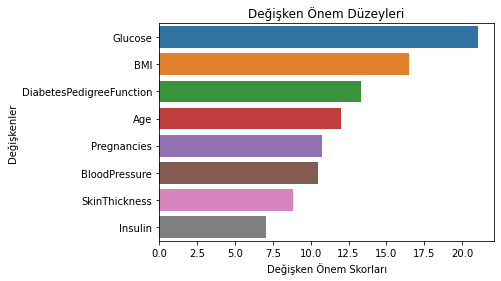

In [23]:
feature_imp = pd.Series(model_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.show()